In [14]:
import os
import re
from fastai.vision.all import *

In [15]:
path = "samples"
dir_list = os.listdir(path)

In [16]:
dirNoSuffix = [i[0:-4] for i in dir_list]

In [17]:
allchars =  "".join(dirNoSuffix)
allUniqueChars = set(allchars)
print(allUniqueChars)

{'p', '2', 'n', 'd', '7', '4', '3', '8', 'b', 'w', 'c', 'x', 'm', 'g', '5', '6', 'f', 'e', 'y'}


In [18]:
encodingDict = {}
for key, val in enumerate(allUniqueChars):
    encodingDict[val] = key

In [19]:
encodingDict

{'p': 0,
 '2': 1,
 'n': 2,
 'd': 3,
 '7': 4,
 '4': 5,
 '3': 6,
 '8': 7,
 'b': 8,
 'w': 9,
 'c': 10,
 'x': 11,
 'm': 12,
 'g': 13,
 '5': 14,
 '6': 15,
 'f': 16,
 'e': 17,
 'y': 18}

In [20]:
def label_func(fname):
    # return fname.name[0:-4]
    fname = fname[0:-4]
    returnarray = np.zeros((len(fname), len(allUniqueChars)), dtype=int)
    for i in range(len(fname)):
        returnarray[i][encodingDict[fname[i]]] = 1
    return returnarray.flatten()

In [21]:
dblock = DataBlock()

In [22]:
dsets = dblock.datasets("samples")

IndexError: list index out of range

In [24]:
dls = dblock.dataloaders(path)
dls.show_batch()

IndexError: list index out of range

In [13]:
learn = vision_learner(dls, resnet34)
learn.fine_tune(4)

NameError: name 'dls' is not defined

In [11]:
learn.predict("samples/y33nm.png")

NameError: name 'learn' is not defined

In [25]:
all_samples = os.listdir(path)

In [26]:
def label_func(name):
    name = name[0:-4]
    encoded = ""
    for i, j in enumerate(name):
        encoded += str(i) + j + " "
    encoded = encoded[0:-1]
    return encoded

In [27]:
all_labels = [label_func(i) for i in all_samples]

In [38]:
df = pd.DataFrame({"name": all_samples, "label": all_labels})

In [39]:
df

,name,label
0,226md.png,02 12 26 3m 4d
1,22d5n.png,02 12 2d 35 4n
2,2356g.png,02 13 25 36 4g
3,23mdg.png,02 13 2m 3d 4g
4,23n88.png,02 13 2n 38 48
...,...,...
1065,yx2d4.png,0y 1x 22 3d 44
1066,yxd7m.png,0y 1x 2d 37 4m
1067,yy824.png,0y 1y 28 32 44
1068,yyg5g.png,0y 1y 2g 35 4g


In [40]:
# Define a DataBlock
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
    get_x = ColReader(0, pref=path + "/"),
    get_y = ColReader(1, label_delim=' '),
    splitter = RandomSplitter(valid_pct=0.2, seed=42))

# Create a DataLoaders

In [41]:
dls = dblock.dataloaders(df)

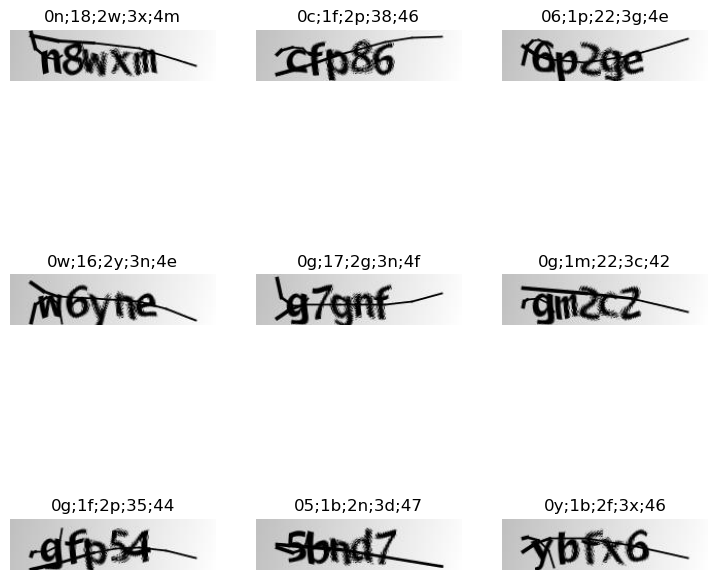

In [42]:
dls.show_batch()

In [36]:
learn = vision_learner(dls, resnet34)
learn.fit(50)

SuggestedLRs(valley=0.0003311311302240938)

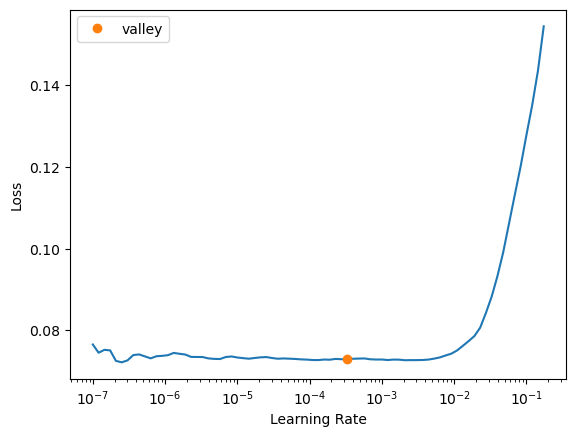

In [43]:
learn.lr_find()

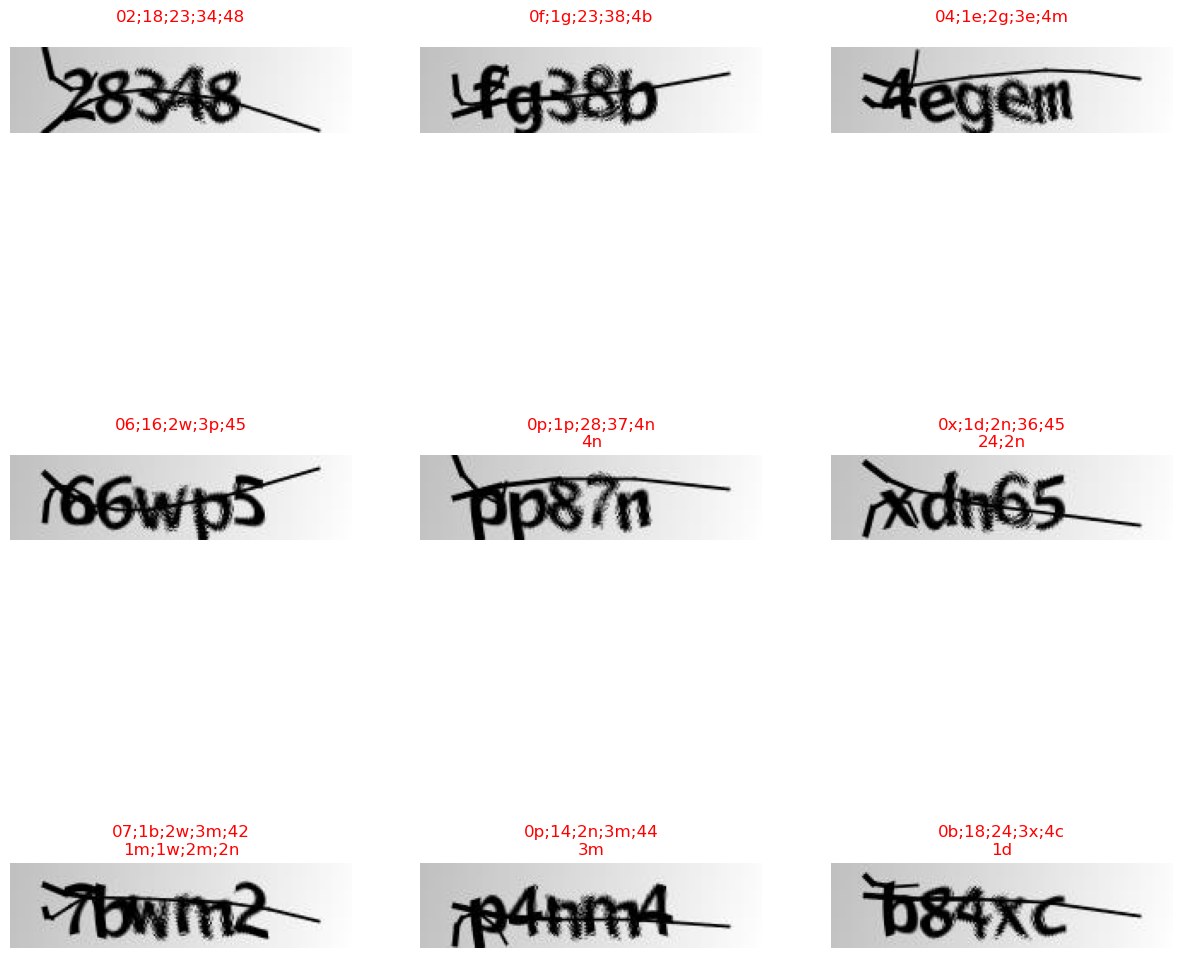

In [37]:
learn.show_results(figsize=(15,15))